In [41]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [69]:
from src.preprocess import Preprocessor

In [75]:
my_preprocessor = Preprocessor()
pass_lengths, ques_lengths = my_preprocessor.analyze("./data/data_raw/train-v1.1.json")

Analyzing ./data/data_raw/train-v1.1.json: 100%|██████████| 442/442 [00:35<00:00, 12.56it/s]

Statistics of ./data/data_raw/train-v1.1.json
How many (passage, question, answer) tuples : 87599 
pass_max_length: 766 
pass_ave_length: 137
ques_max_length: 60 
ques_ave_length :11 



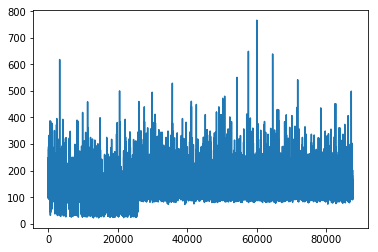

In [73]:
plt.plot(pass_lengths)

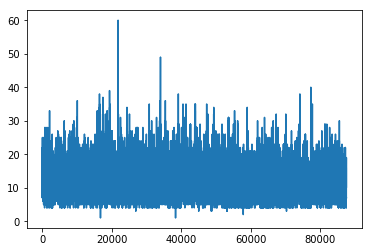

In [74]:
plt.plot(ques_lengths)

In [139]:
#visualize train-stat
def get_data(stat1_file):
    with open(stat1_file) as f:
        stat1 = json.load(f)
    print stat1["config"]
    batch_loss = [float (batch["batch_loss"]) for batch in stat1["train_stat"]]

    train_loss = [float (batch["train_loss"]) for batch in stat1["train_stat"]]
    train_em = [float (batch["train_em"]) for batch in stat1["train_stat"]]
    train_f1 = [float (batch["train_f1"]) for batch in stat1["train_stat"]]
    valid_loss = [float (batch["valid_loss"]) for batch in stat1["train_stat"]]
    valid_em = [float (batch["valid_em"]) for batch in stat1["train_stat"]]
    valid_f1 = [float (batch["valid_f1"]) for batch in stat1["train_stat"]]
    
    return batch_loss, train_loss, train_em, train_f1, valid_loss, valid_em, valid_f1
def paint(batch_loss, train_loss, train_em, train_f1, valid_loss, valid_em, valid_f1):
    plt.subplot(211)
    plt.plot(batch_loss, label='batch loss')
    plt.plot(train_loss, label = "sample train loss")
    plt.plot(valid_loss, label = "sample valid loss")
#     plt.xlabel('# (100 mini batches)')
    plt.title(stat1["config"]["arch"])
    plt.legend()
    
    
    plt.subplot(212)
    plt.plot(train_em, label = "sample train em")
    plt.plot(train_f1, label = "sample train f1")
    plt.plot(valid_em, label = "sample valid em")
    plt.plot(valid_f1, label = "sample valid f1")
    plt.xlabel('# (100 mini batches)')
#     plt.title(stat1["config"]["arch"])
    plt.legend()
def draw_join(stat_files):
    result = [[], [], [], [], [], [], []]
    for stat_file in stat_files:
        temp = get_data(stat_file)
        for i in xrange(len(result)):
            result[i] += temp[i]
    batch_loss, train_loss, train_em, train_f1, valid_loss, valid_em, valid_f1 =result
    paint(batch_loss, train_loss, train_em, train_f1, valid_loss, valid_em, valid_f1)
def draw(stat1_file, percent = 1.0):
    
    result = [[], [], [], [], [], [], []]
    temp = get_data(stat1_file)
    for i in xrange(len(result)):
        result[i] += temp[i]
    batch_loss, train_loss, train_em, train_f1, valid_loss, valid_em, valid_f1 =result
    paint(batch_loss, train_loss, train_em, train_f1, valid_loss, valid_em, valid_f1)
    



In [140]:
#an error in data is found after a brunch of trainning are done....... Below are those train_statS

{u'n_epoch': 10, u'embed_size': 100, u'pass_max_length': 400, u'reg_scale': 0.001, u'batch_size': 32, u'sample_size': 200, u'clip_norm': 5, u'lr': 0.002, u'num_units': 64, u'ques_max_length': 30, u'arch': u'match'}
{u'n_epoch': 1, u'embed_size': 100, u'pass_max_length': 400, u'reg_scale': 0.001, u'batch_size': 32, u'sample_size': 200, u'clip_norm': 5, u'lr': 0.002, u'num_units': 64, u'ques_max_length': 30, u'arch': u'match'}


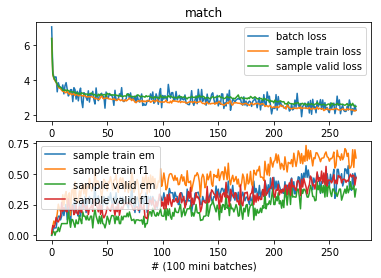

In [141]:
#attemping to get turnning point of validation loss on match
#train match, lr = 0.002
#job67 continues job63. aka epoch = 11 indeed. However, validation loss does not go up... Where is the turnning point!
draw_join(["./output/job63/Stat-March-13-2018-08-18-21", "./output/job67/Stat-March-16-2018-04-41-33"])

In [142]:
#Compare some lr on match

{u'n_epoch': 10, u'embed_size': 100, u'pass_max_length': 400, u'reg_scale': 0.001, u'batch_size': 32, u'sample_size': 200, u'clip_norm': 5, u'lr': 0.002, u'num_units': 64, u'ques_max_length': 30, u'arch': u'match'}


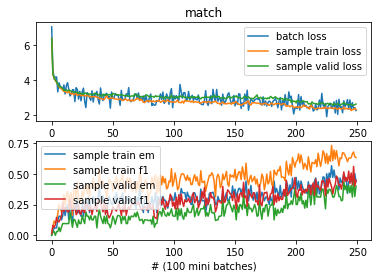

In [143]:
#lr = 0.002
draw("./output/job63/Stat-March-13-2018-08-18-21", 0.1)

{u'n_epoch': 1, u'embed_size': 100, u'pass_max_length': 400, u'reg_scale': 0.001, u'batch_size': 32, u'sample_size': 200, u'clip_norm': 5, u'lr': 0.004, u'num_units': 64, u'ques_max_length': 30, u'arch': u'match'}


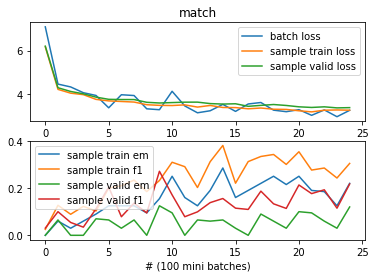

In [123]:
#lr = 0.004
draw("./output/job64/Stat-March-16-2018-01-30-17")

{u'n_epoch': 1, u'embed_size': 100, u'pass_max_length': 400, u'reg_scale': 0.001, u'batch_size': 32, u'sample_size': 200, u'clip_norm': 5, u'lr': 0.01, u'num_units': 150, u'ques_max_length': 30, u'arch': u'match'}


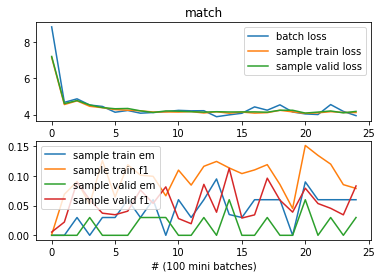

In [124]:
#lr = 0.01
draw("./output/job62/Stat-March-13-2018-02-08-31")

{u'n_epoch': 1, u'embed_size': 100, u'pass_max_length': 400, u'reg_scale': 0.001, u'batch_size': 32, u'sample_size': 200, u'clip_norm': 5, u'lr': 0.02, u'num_units': 64, u'ques_max_length': 30, u'arch': u'match'}


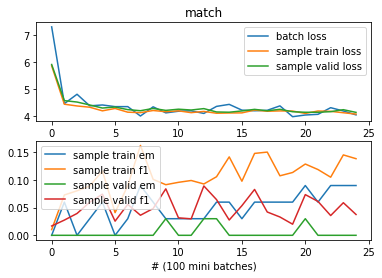

In [125]:
#lr = 0.02
draw("./output/job61/Stat-March-12-2018-08-40-07")

In [ ]:
#compare lr on r_net

{u'n_epoch': 1, u'embed_size': 100, u'pass_max_length': 400, u'reg_scale': 0.001, u'batch_size': 32, u'sample_size': 200, u'clip_norm': 10, u'lr': 0.002, u'num_units': 64, u'ques_max_length': 30, u'arch': u'r_net'}


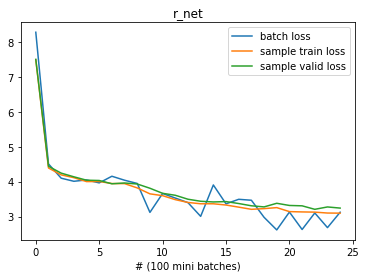

In [91]:
draw_loss("./output/job58/Stat-March-09-2018-11-13-35")

In [126]:
#compare lr on match_simple

{u'n_epoch': 1, u'embed_size': 100, u'pass_max_length': 400, u'reg_scale': 0.001, u'batch_size': 32, u'sample_size': 200, u'clip_norm': 10, u'lr': 0.002, u'num_units': 64, u'ques_max_length': 30, u'arch': u'match_simple'}


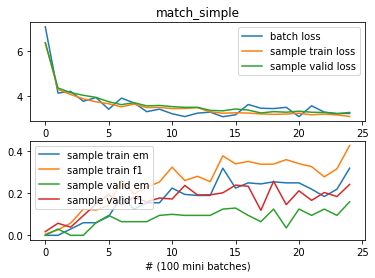

In [127]:
draw("./output/job59/Stat-March-10-2018-04-54-14")

In [ ]:
#Re-train match on corrected data!
#Re-train match on corrected data!
#Re-train match on corrected data!
#Re-train match on corrected data!
#Re-train match on corrected data!
#Re-train match on corrected data!
#Re-train match on corrected data!
#Re-train match on corrected data!

{u'n_epoch': 1, u'embed_size': 100, u'pass_max_length': 400, u'reg_scale': 0.001, u'batch_size': 32, u'sample_size': 200, u'clip_norm': 5, u'lr': 0.002, u'num_units': 64, u'ques_max_length': 30, u'arch': u'match'}


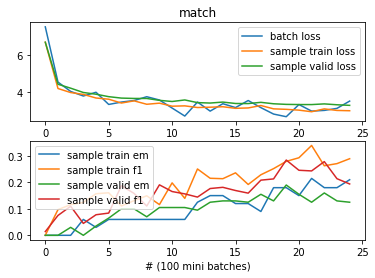

In [128]:
draw("./output/job68/Stat-March-16-2018-07-57-58")